Let's import 'italian_names.txt' and create a **list of names** from it

In [1]:
names = []

with open("italian_names.txt", "r") as f:
    for line in f:
        line = line.strip()
        if line:
            parts = line.split()
            names.extend(parts)

In [3]:
print(f"Names before removing duplicates: {len(names)}")
names = list(set(names))
print(f"Names after removing duplicates: {len(names)}")

Names before removing duplicates: 232130
Names after removing duplicates: 15363


In [4]:
chars = sorted(list(set(''.join(names))))
chars

['\x07',
 "'",
 ',',
 '-',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '`',
 'Š',
 '‚',
 '•']

 Let's remove annoying characters `[',', '\'', '-', '``', '•', 'Š', '\x07']`

In [5]:
chs_to_del = [',', '\'', '-', '`', '•', '‚']
words = []
for name in names:
    if 'Š' in name or '\x07' in name:
        continue
    for ch in chs_to_del:
        name = name.replace(ch,'')
    words.append(name.lower())

In [6]:
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [7]:
min(len(w) for w in words)

1

There's probably a string with only one character.

In [8]:
for w in words:
    if len(w) == 1: words.remove(w)

In [9]:
min(len(w) for w in words)

2

In [10]:
max(len(w) for w in words)

19

Let's build a **bigram** using a dictionary

In [11]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # add the start and the end character to each name
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # inizialize every new bigram to 0 occurrences

In [12]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('a', '<E>'), 5183),
 (('a', 'n'), 2905),
 (('<S>', 'a'), 2400),
 (('a', 'r'), 1992),
 (('i', 'a'), 1861),
 (('r', 'i'), 1755),
 (('m', 'a'), 1708),
 (('n', '<E>'), 1699),
 (('n', 'a'), 1664),
 (('<S>', 'm'), 1564),
 (('e', '<E>'), 1541),
 (('o', '<E>'), 1460),
 (('i', 'n'), 1455),
 (('e', 'l'), 1414),
 (('r', 'a'), 1377),
 (('<S>', 's'), 1151),
 (('a', 'l'), 1116),
 (('h', 'a'), 1113),
 (('e', 'r'), 1102),
 (('e', 'n'), 1093),
 (('l', 'i'), 1055),
 (('<S>', 'e'), 1046),
 (('s', 'a'), 1038),
 (('l', 'a'), 1018),
 (('l', 'e'), 1013),
 (('i', 's'), 904),
 (('<S>', 'g'), 848),
 (('i', '<E>'), 840),
 (('n', 'i'), 840),
 (('a', 'm'), 811),
 (('n', 'e'), 759),
 (('r', 'e'), 752),
 (('<S>', 'd'), 745),
 (('a', 's'), 740),
 (('m', 'i'), 736),
 (('o', 'n'), 733),
 (('t', 'a'), 719),
 (('i', 'l'), 712),
 (('<S>', 'r'), 706),
 (('d', 'a'), 698),
 (('r', '<E>'), 667),
 (('i', 'o'), 656),
 (('<S>', 'n'), 651),
 (('<S>', 'c'), 647),
 (('<S>', 'f'), 636),
 (('e', 's'), 634),
 (('<S>', 'j'), 622),
 

It's more convinient for us to store this information in a **2-D array**: the *rows* are going to be the *first character* of each bigram and the *columns* are going to be the *second character*; each entry in this array will tell us **how often a second character follows a first character** in the dataset. We will use a *tensor* from **Pytorch**.

In [13]:
import torch

In [14]:
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
itos = {i:s for s,i in stoi.items()}

In [15]:
N = torch.zeros((28,28), dtype=torch.int32)

It's time to populate the 2D array *as previously established*, but instead of considering the characters we use their **mapping** defined in **`stoi`**

In [16]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # add the start and the end character to each name
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

Let's see how **`N`** looks like converting it in a **dataframe** and using **`matplotlib`**

In [17]:
numpy_array = N.detach().numpy()

In [18]:
import pandas as pd
df = pd.DataFrame(numpy_array)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,181,487,206,540,169,195,158,372,553,168,...,740,622,157,204,63,27,313,158,0,5183
1,314,16,1,124,357,0,2,26,216,14,...,1,15,26,2,0,0,15,0,0,118
2,423,0,64,0,279,2,0,415,158,3,...,12,16,15,2,0,1,24,0,0,35
3,698,0,0,50,612,2,5,41,602,52,...,12,2,75,8,13,0,58,3,0,361
4,247,96,51,370,345,83,71,77,185,81,...,634,441,44,121,27,40,116,74,0,1541
5,346,0,1,4,173,35,2,3,204,7,...,11,7,13,0,3,0,10,2,0,108
6,194,1,0,9,258,0,9,70,572,34,...,1,3,101,0,2,2,16,4,0,96
7,1113,5,2,27,412,4,1,1,411,6,...,22,12,82,6,6,0,27,3,0,211
8,1861,126,475,332,417,105,97,108,26,123,...,904,353,140,97,10,24,106,115,0,840
9,475,1,3,35,176,0,0,14,159,4,...,20,5,99,11,4,0,3,2,0,72


In [19]:
import matplotlib.pyplot as plt

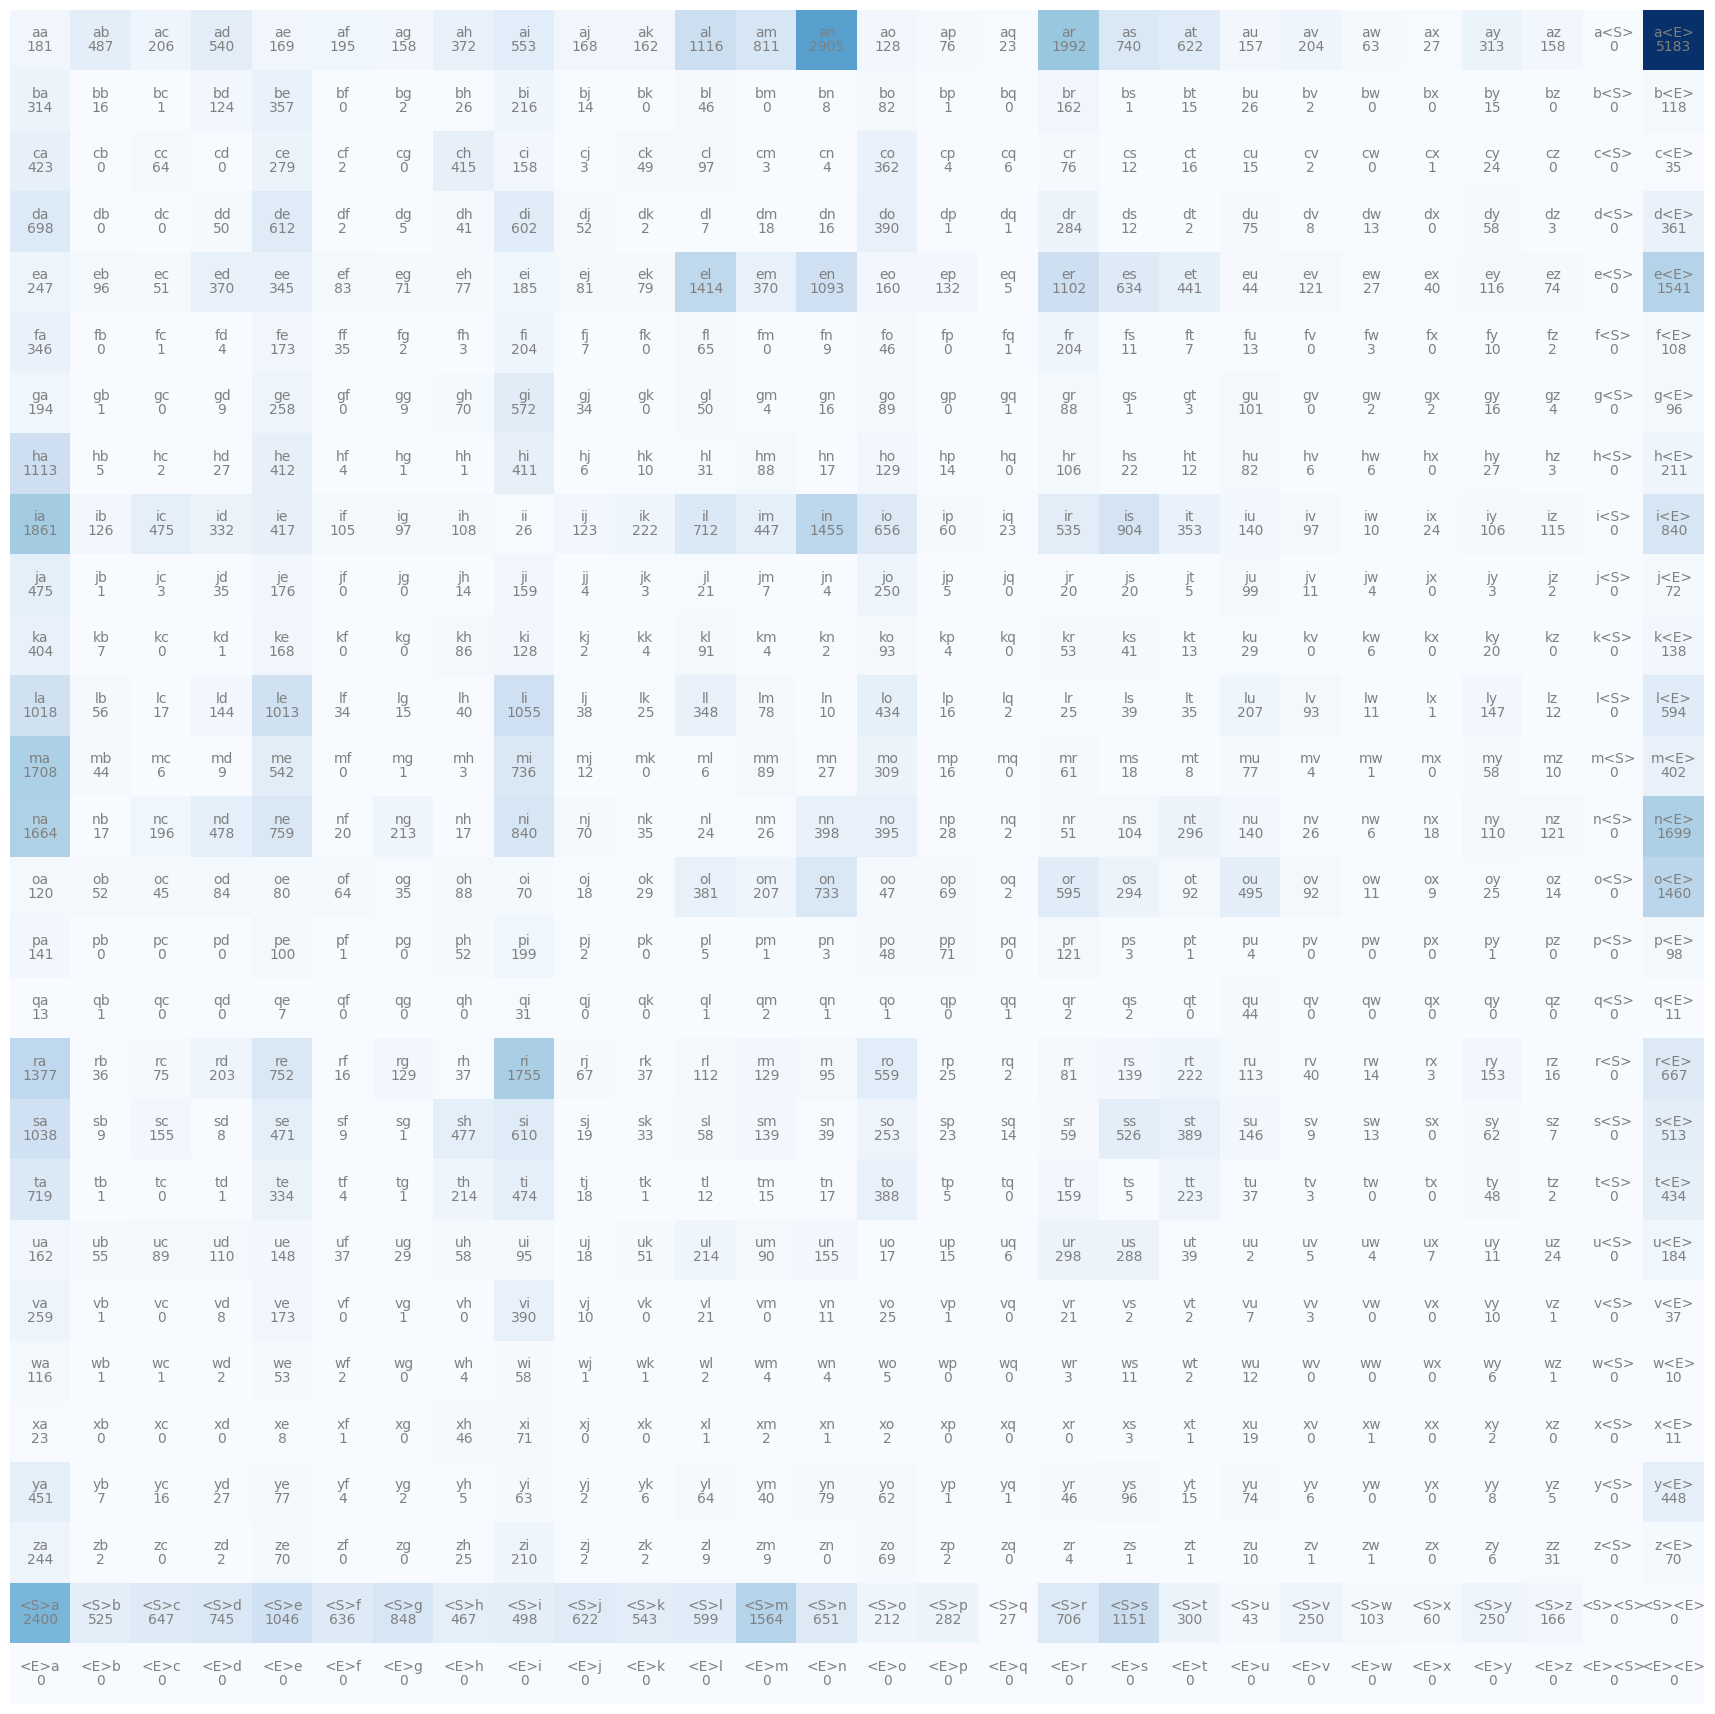

In [20]:
%matplotlib inline
plt.figure(figsize=(22,22))
plt.imshow(N,cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j] # something like 'a' + 'b' -> 'ab'
        plt.text(j,i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j,i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')
plt.show()

It's not difficult to spot **two lines of zeros**: the last row and the second-last column. It makes sense if we consider the meaning that we gave to `'<S>'` and `'<E>'`: ***there are no empty words, no words with a character after `'<E>'` and before `'<S>'`***.
To avoid wasting space and to make everything more readable let's replace `'<S>'` and `'<E>'` with `'.'`.

In [21]:
stoi = {s:i+1 for i,s in enumerate(chars)} # '.' mapped as 0
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [22]:
N = torch.zeros((28,28), dtype=torch.int32)

In [23]:
for w in words:
    chs = ['.'] + list(w) + ['.'] # add the start and the end character to each name
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

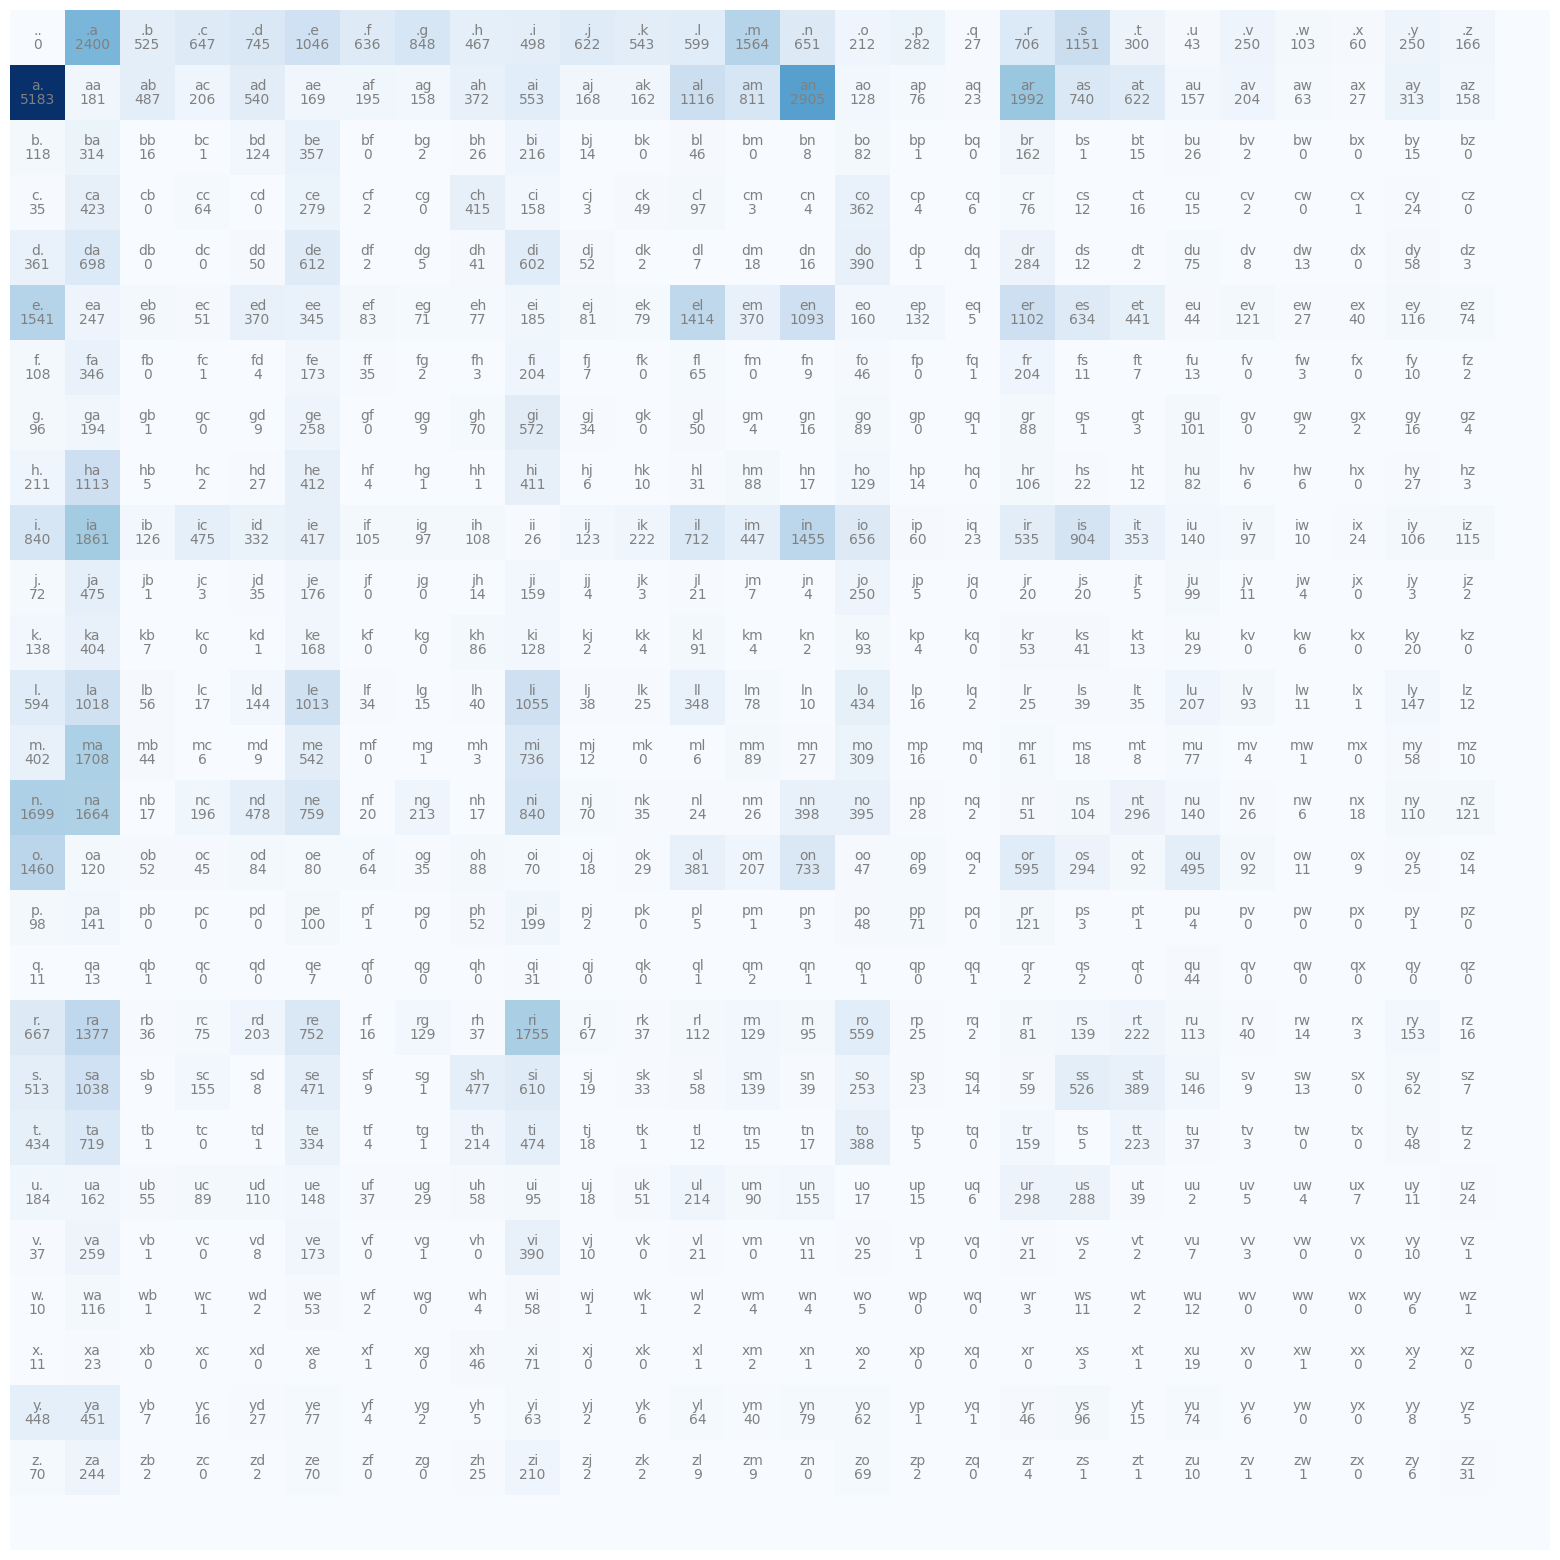

In [58]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(N,cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] # something like 'a' + 'b' -> 'ab'
        plt.text(j,i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j,i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')
plt.show()

#### Sampling from the model